#  Email Spam Detection using Supervised Learning Techniques

### What is Spam?

Spamming is the use of messaging systems to send multiple unsolicited messages (spam) to large numbers of recipients for the purpose of commercial advertising or simply sending the same message over and over to the same user. 

### What is Spam Detection ?

A `Spam Detection` is a process that is used to detect unwanted email and use to prevent those messages from getting to a user's inbox. Like other types of filtering programs, a spam filter looks for certain criteria on which it bases judgments. For example, the simplest and earliest versions (such as the one available with Microsoft's Hotmail) can be set to watch for particular words in the subject line of messages and to exclude these from the user's inbox.

### Why Spam Detection?

The Spam is a threat to the users of internet globally. We need Spam Detection due to the challenges faced by the service providers because of the following negative effects :

- Spam deteriorates the quality of search results and deprive legitimate websites of their revenue.

- User trust is weakened due to the search engine provider which is an especially tangible issue to zero cost of switching from one search provider to another.

- Spam websites are means of malware and adult content circulation and phishing attack.

- Identification of the most appropriate tags for the given content and to eliminate the spam tag.

### Objective

In the proposed project we will be using supervised learning techniques for Spam Email Detection. It analyses the content and find patterns which are used to identify Spam & Non-Spam(Ham) Emails.

Content-based methods analyze the content of the E-mails to determine if they are spam or not. The goal of our project is to analyze machine learning algorithms and determine their effectiveness as content-based spam filters.

### Steps involved in this Project :

 - Load datasets    
 - Text Cleaning and Feature Extraction
 - Split into training and test datasets                                                                                 
 - Build a Model                                            
 - Test Accuracy 
 - future work(using DL and NN)

In [1]:
# import PIL
# from PIL import Image
# img=Image.open("NB.png") 

### Life Cycle of the Project

In [2]:
# img

####  Step 1. Explore and Understand Your Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df = pd.read_csv('smsspamcollection', sep='\t', names=['label', 'sms_message'])

# Output printing out first 5 columns
print(df.head())


  label                                        sms_message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


 - Convert the values in the 'label' column to numerical values using map method as follows: {'ham':0, 'spam':1}. This maps the 'ham' value to 0 and the 'spam' value to 1.                         
 - Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 'shape'.

In [2]:
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.head())

   label                                        sms_message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [3]:
df.groupby('label').describe().T #we observed details about spam and ham messages

label                                    0  \
sms_message count                     4825   
            unique                    4516   
            top     Sorry, I'll call later   
            freq                        30   

label                                                               1  
sms_message count                                                 747  
            unique                                                653  
            top     Please call our customer service representativ...  
            freq                                                    4

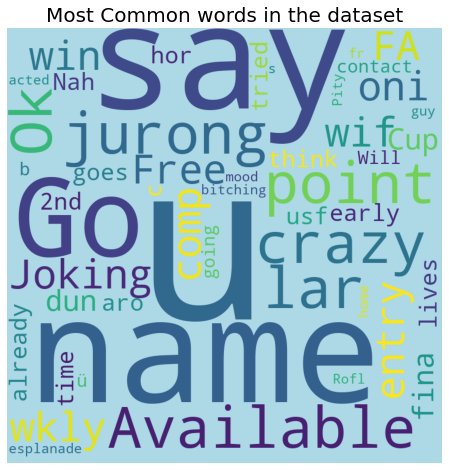

In [4]:
# checking the most frequent words in the whole dataset through wordcloud

from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightblue', width = 800, height = 800, max_words = 50).generate(str(df['sms_message']))
plt.figure(figsize=(8,8))
plt.title('Most Common words in the dataset', fontsize = 20)
plt.axis('off')
plt.imshow(wordcloud)

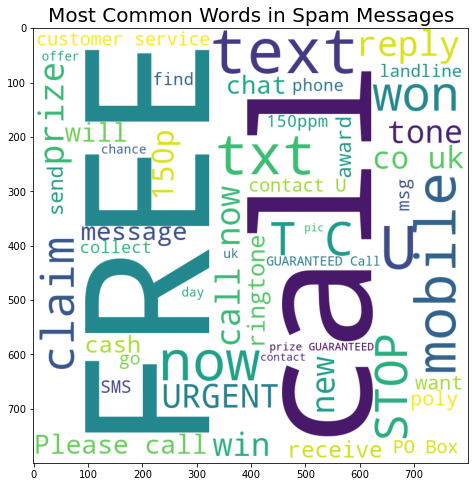

In [5]:
spam = ' '.join(text for text in df['sms_message'][df['label'] == 1])
plt.figure(figsize=(8,8))
wordcloud = WordCloud(background_color = 'white', max_words = 50, height = 800, width = 800).generate(spam)
plt.title('Most Common Words in Spam Messages', fontsize = 20)
plt.imshow(wordcloud)

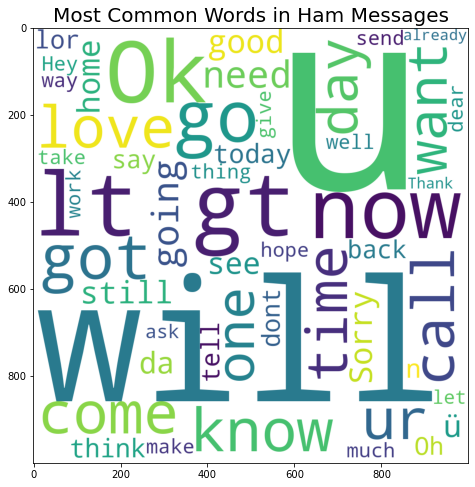

In [6]:
ham = ' '.join(text for text in df['sms_message'][df['label'] == 0])
plt.figure(figsize=(8,8))
wordcloud = WordCloud(background_color = 'white', max_words = 50, height = 1000, width = 1000).generate(ham)
plt.title('Most Common Words in Ham Messages', fontsize = 20)
plt.imshow(wordcloud)

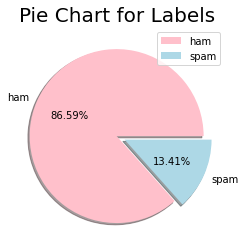

In [7]:
size = [4825, 747]  #len(spam)=4825,len(ham)=747 #(describe)
labels = ['ham', 'spam']
colors = ['pink', 'lightblue']

plt.pie(size, colors = colors, labels = labels, shadow = True, explode=(0,0.1),autopct = '%.2f%%')
#autopct enables you to display the percent value using Python string formatting. 
plt.title('Pie Chart for Labels', fontsize = 20)
plt.legend()
plt.show()

### Step 2. Text Cleaning  and  Feature Extraction

 As most of ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.
Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text.


# Implementing Bag of Words 



 The Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

 Using a process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrance of each word or token in that document.

In [8]:
docs = ['Hello, how are you!',
        'Win money, win from home.',
        'Call me now.',
        'Hello, Call hello you tomorrow?']

####  1: Convert all strings to their lower case form. 

In [9]:
lower_docs = []
for i in docs:
    lower_docs.append(i.lower())
print(lower_docs)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


#### 2: Removing all punctuations 

In [10]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in string:  
        if i in punc:  
            string = string.replace(i, "") 
    return string
 
lower_docs = [remove_punc(i) for i in lower_docs]
print(lower_docs) # cleaned list

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


####  3: Tokenization 

Tokenizing a sentence in a document set means splitting up a sentence into individual words using a delimiter. The delimiter specifies what character we will use to identify the beginning and the end of a word(for example we could use a single space as the delimiter for identifying words in our document set.)

In [11]:
preprocessed_docs = []
for i in lower_docs:
    preprocessed_docs.append(i.split(' '))
print(preprocessed_docs)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


####  4: Count frequencies 

In [12]:
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_docs:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


#### Importing CountVectorizer from sci-kit  learn

Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()


###### To handle this, we will be using sklearn's count vectorizer method which does the following:

 - It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.                  
 - It counts the occurrance of each of those tokens.


In [14]:
docs = ['Hello, how are you!',
        'Win money, win from home.',
        'Call me now.',
        'Hello, Call hello you tomorrow?']

###### Cleaning of Data using count_vectorizer in scikit learn

Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words 
which have been categorized as features using the get_feature_names() method.

In [15]:
count_vector.fit(docs)
count_vector.get_feature_names()

C:\Users\rites\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

Create a matrix with the rows being each of the 4 documents, and the columns being each word. 
The corresponding (row, column) value is the frequency of occurrance of that word(in the column) in a particular
document(in the row). You can do this using the transform() method and passing in the document data set as the 
argument. The transform() method returns a matrix of numpy integers, you can convert this to an array using
toarray(). Call the array 'doc_array'

In [16]:
doc_array = count_vector.transform(docs).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

Convert the array we obtained, loaded into 'doc_array', into a dataframe and set the column names to the word names(which you computed earlier using get_feature_names(). Call the dataframe 'frequency_matrix'.

In [17]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


### Step3: Training and Testing our Model

###### Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data using the following variables:

 1. X_train is our training data for the 'sms_message' column.
 2. y_train is our training data for the 'label' column
 3. X_test is our testing data for the 'sms_message' column.
 4. y_test is our testing data for the 'label' column   
 
    

**Print out the number of rows we have in each our training and testing data.**

In [18]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],  df['label'], random_state=1,test_size = 0.3)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the testing set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 3900
Number of rows in the testing set: 1672


###### Firstly, we have to fit our transformed training data (X_train) into CountVectorizer() and return the matrix.
###### Secondly, we have to transform our testing data (X_test) to return the matrix.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)


### Step 4: Implementing Supervised Learning Algorithms

####  1. Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
nb_pred = naive_bayes.predict(testing_data)

nb_acc = accuracy_score(y_test,nb_pred)*100
nb_prec= precision_score(y_test,nb_pred)*100
nb_rec= recall_score(y_test,nb_pred)*100
nb_f1= f1_score(y_test,nb_pred)*100

#### 2. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(training_data,y_train)
rf_pred = rf.predict(testing_data)

rf_acc = accuracy_score(y_test,rf_pred)*100
rf_prec= precision_score(y_test,rf_pred)*100
rf_rec= recall_score(y_test,rf_pred)*100
rf_f1= f1_score(y_test,rf_pred)*100

   #### 3. Support Vector Machine(SVM)

In [22]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(training_data,y_train)
sv_pred=sv.predict(testing_data)

sv_acc = accuracy_score(y_test,sv_pred)*100
sv_prec= precision_score(y_test,sv_pred)*100
sv_rec= recall_score(y_test,sv_pred)*100
sv_f1= f1_score(y_test,sv_pred)*100

#### 4. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(training_data, y_train)
log_pred = log.predict(testing_data)

log_acc = accuracy_score(y_test,log_pred)*100
log_prec= precision_score(y_test,log_pred)*100
log_rec= recall_score(y_test,log_pred)*100
log_f1= f1_score(y_test,log_pred)*100

### Step 5. Scoring and Metrics

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

 `Accuracy`  measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

` Precision` tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

`Recall(sensitivity)` tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy.                  

`F1 score` is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best  possible F1 score.

F1 Score = 2*[(precision*recall) / (precision+recall)]

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.



### NAIVE BAYES METRIC SCORE

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, nb_pred)))
print('Precision score: ', format(precision_score(y_test, nb_pred)))
print('Recall score: ', format(recall_score(y_test, nb_pred)))
print('F1 score: ', format(f1_score(y_test, nb_pred)))

Accuracy score:  0.9874401913875598
Precision score:  0.9728506787330317
Recall score:  0.9347826086956522
F1 score:  0.9534368070953437


### RANDOM FOREST METRIC SCORE

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, rf_pred)))
print('Precision score: ', format(precision_score(y_test, rf_pred)))
print('Recall score: ', format(recall_score(y_test, rf_pred)))
print('F1 score: ', format(f1_score(y_test, rf_pred)))

Accuracy score:  0.9754784688995215
Precision score:  0.9896373056994818
Recall score:  0.8304347826086956
F1 score:  0.9030732860520094


### SUPPORT VECTOR MACHINE METRIC SCORE

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, sv_pred)))
print('Precision score: ', format(precision_score(y_test, sv_pred)))
print('Recall score: ', format(recall_score(y_test, sv_pred)))
print('F1 score: ', format(f1_score(y_test, sv_pred)))

Accuracy score:  0.9766746411483254
Precision score:  0.9798994974874372
Recall score:  0.8478260869565217
F1 score:  0.9090909090909091


### LOGISTIC REGRESSION METRIC SCORE

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, log_pred)))
print('Precision score: ', format(precision_score(y_test, log_pred)))
print('Recall score: ', format(recall_score(y_test, log_pred)))
print('F1 score: ', format(f1_score(y_test, log_pred)))

Accuracy score:  0.9814593301435407
Precision score:  0.9806763285024155
Recall score:  0.8826086956521739
F1 score:  0.9290617848970252


### Comparision of Metric Scores

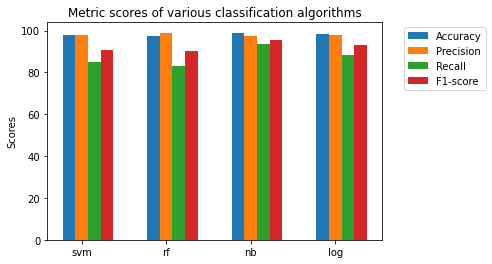

In [28]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['sv','rf','nb','log']
accuracy=[sv_acc,rf_acc,nb_acc,log_acc]
precision=[sv_prec,rf_prec,nb_prec,log_prec]
recall=[sv_rec,rf_rec,nb_rec,log_rec]
f1_score=[sv_f1,rf_f1,nb_f1,log_f1]

width = 0.3  
r1 = np.arange(0,len(labels)*2,2) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = plt.bar(r1, accuracy, width, label='Accuracy')
rects2 = plt.bar(r2, precision, width, label='Precision')
rects3 = plt.bar(r3, recall, width, label='Recall')
rects4 = plt.bar(r4, f1_score, width, label='F1-score')
plt.rcParams["figure.figsize"] = (15,5)

plt.ylabel('Scores')
plt.title('Metric scores of various classification algorithms')
plt.xticks([r + width for r in range(0,len(labels)*2,2)], ['svm','rf','nb','log'])
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()


### Confusion Matrix

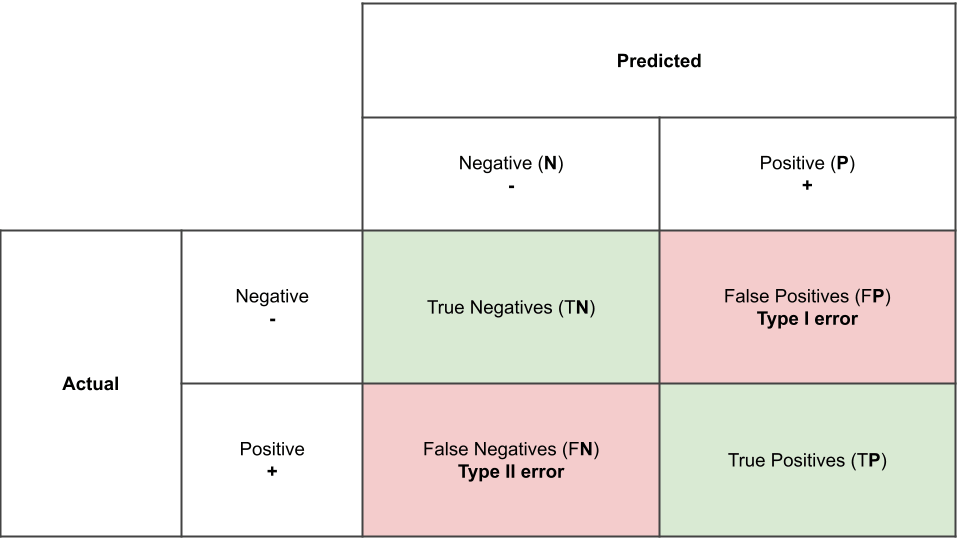

In [29]:
from PIL import Image
img  = Image.open("confusionmatrix.png") 
img

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(nb_pred , y_test))

[[1436   15]
 [   6  215]]


We observed that False positive and False negative values are low and True positive and True negative values are high.
That means our model has done a pretty good job here.

###### Classification Report

In [31]:
from sklearn.metrics import classification_report
target_names = ['Ham', 'Spam']
print(classification_report(y_test, nb_pred, target_names=target_names))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1442
        Spam       0.97      0.93      0.95       230

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



### Step 6: Conclusion ###

One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 
It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle. All in all, Naive Bayes' really is a gem of an algorithm!

We have succesfully designed a model that can efficiently predict if an Email is spam or not!



FEW EXAMPLES

In [32]:
# msg = 'Free entry in 2 a wkly comp to win FA Cup fi'
# data = [msg]
# vect = count_vector.transform(data).toarray()
# naive_bayes.predict(vect)

In [33]:
msg = 'You have been specially selected for 4-day holiday.speak to our live operator and claim'
data = [msg]
vect = count_vector.transform(data).toarray()
x = naive_bayes.predict(vect)
x

array([1], dtype=int64)

In [34]:
# msg = 'U 447801259231 have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094597'
# data = [msg]
# vect = count_vector.transform(data).toarray()
# x = rf.predict(vect)
# x

In [35]:
# msg = 'Congrats, Your WFH application has been approved, earn upto Rs. 30000 Per month.'
# data = [msg]
# vect = count_vector.transform(data).toarray()
# x = naive_bayes.predict(vect)
# x

In [36]:
msg = 'Solving knapsack problems using a binary gaining sharing knowledge-based optimization algorithm'
data = [msg]
vect = count_vector.transform(data).toarray()
x = naive_bayes.predict(vect)
x

array([0], dtype=int64)

In [37]:
if x==0:
    x="ham"
elif x==1:
    x="spam"
    

In [ ]:
from tkinter import *
def alert_popup(title, message):
    """Generate a pop-up window for special messages."""
    root = Tk()
    root.title(title)
    w = 300     # popup window width
    h = 200     # popup window height
    sw = root.winfo_screenwidth()
    sh = root.winfo_screenheight()
    x = (sw - w)/2
    y = (sh - h)/2
    root.geometry('%dx%d+%d+%d' % (w, h, x, y))
    m = message
    w = Label(root, text=m, width=50, height=10)
    w.pack()
    b = Button(root, text="OK", command=root.destroy, width=10)
    b.pack()
    mainloop()

alert_popup("SPAM OR HAM", x)
